<a href="https://colab.research.google.com/github/MadhuOruganti/Easy-Pair-selection-Method-for-Kinship-Verification-in-Chidren-Images/blob/main/Wavenet_Facenet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import cv2
import pywt
import scipy
import pywt.data
import numpy as np
from scipy import signal
from scipy import misc # pip install Pillow
from numpy import r_

from tensorflow.keras import layers
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract,Add

import cv2
import numpy as np
import os
import random
#import swt_images

from numpy import asarray
from numpy import expand_dims
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract,Add

import zipfile
import os
import cv2
import matplotlib.pyplot as plt

def swt_features(arr):

    new_image=np.zeros_like(arr)
    m,n,_=new_image.shape    
    gray = cv2.cvtColor(arr, cv2.COLOR_BGR2GRAY)
    #level=0
    features=[]
    for LL, (LH, HL, HH) in pywt.swt2(gray, 'bior1.3', level=1, start_level=0):
        for k, a in enumerate([LL, LH, HL, HH]):
                #a=np.flip(a,0)
                if k==1:
                    #m,n=a.shape
                    #img1=np.reshape(a, (1, m,n,1))
                    #x = layers.Conv2D(64, 3, strides=1, padding="same")(img1)
                    #x = layers.BatchNormalization()(x)
                    #x = layers.Activation("relu")(x)
                    #x1=GlobalMaxPool2D()(x)
                    #features.append(x1)
                    features.append(a)
                    
                    
                elif k==2:
                    #m,n=a.shape
                    #img1=np.reshape(a, (1, m,n,1))
                    #x = layers.Conv2D(64, 3, strides=1, padding="same")(img1)
                    #x = layers.BatchNormalization()(x)
                    #x = layers.Activation("relu")(x)
                    #x1=GlobalMaxPool2D()(x)
                    #features.append(x1)
                    features.append(a)
                elif k==3:
                    #m,n=a.shape
                    #img1=np.reshape(a, (1, m,n,1))
                    #x = layers.Conv2D(64, 3, strides=1, padding="same")(img1)
                    #x = layers.BatchNormalization()(x)
                    #x = layers.Activation("relu")(x)
                    #x1=GlobalMaxPool2D()(x)
                    #features.append(x1)
                    features.append(a)


    #features= np.concatenate((features[0], features[1], features[2]), axis=-1)

    for i in range(m):
      for j in range(n):
        b=features[0][i,j]
        g=features[0][i,j]
        r=features[0][i,j]
        new_image[i,j]=[b,g,r]
    

    return new_image

#print(grayscale_batch.shape)  # (64, 224, 224)
#rgb_batch = np.repeat(grayscale_batch[..., np.newaxis], 3, -1)
#print(rgb_batch.shape)  # (64, 224, 224, 3)


local_zip = '/content/Training_Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

print(len(os.listdir('/tmp//Training_Dataset')))
path1='/tmp/Training_Dataset'
folder=path1

#path1= 'E:/Madhu_0110/SWT_CODE_0811_1/SWT_CODE/images/images'
#path1='E:/Madhu_0110/SWT_CODE_0811_1/SWT_CODE/YCCH_images'
folder=path1
mylist=np.sort(os.listdir(path1))
print (len(mylist))


fd=[]
#print mylist
Image_index=[]
Image_index1=[]
f_cnt=0
Images=[]
for filename in mylist:
    img1 = cv2.imread(os.path.join(folder,filename))
    img1=cv2.resize(img1, (160, 160),interpolation = cv2.INTER_NEAREST)
    #print (img1.shape)
    #print (madhu)
    fd1= swt_features(img1)
    Images.append(img1)
    Image_index.append(filename)
    #print (fd1.shape)
    #print (madhu)
    #fd2=expand_dims(fd1, axis=0)
    #print (fd2.shape)
    #fd3=fd2.repeat(3, axis=-1)
    #print (fd3.shape)
    fd.append(fd1)
    #print (madhu)



import tensorflow as tf
from keras.layers import Flatten
from keras.models import Model

from numpy import load
from numpy import expand_dims
from numpy import asarray
from numpy import savez_compressed
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


model = InceptionV3(include_top=False, input_tensor=Input(shape=(160, 160, 3)))

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(512, activation='relu')(class1)
x1   = Dense(256, activation='relu')(output)

# define new model
model = Model(inputs=model.inputs, outputs=x1)


#model = models.Sequential()
#model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))


#flat1 = Flatten()(model.layers[-1].output)
#class1 = Dense(1024, activation='relu')(flat1)
#output = Dense(512, activation='relu')(class1)
#x1   = Dense(256, activation='relu')(output)

# define new model
#model = Model(inputs=model.inputs, outputs=x1)



# get the face embedding for one face
def get_embedding(model, face_pixels):
	# scale pixel values
	face_pixels = face_pixels.astype('float32')
	# standardize pixel values across channels (global)
	mean, std = face_pixels.mean(), face_pixels.std()
	face_pixels = (face_pixels - mean) / std
	# transform face into one sample
	samples = expand_dims(face_pixels, axis=0)
	# make prediction to get embedding
	yhat = model.predict(samples)
	
	return yhat[0]




# convert each face in the train set to an embedding
newTrainX = list()
for image in fd:
	#embedding = get_embedding(model, face_pixels)
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	embedding = model.predict(image)
	newTrainX.append(embedding[0])
newTrainX = asarray(newTrainX)
print(newTrainX.shape)

In [6]:
from keras.models import load_model
from keras.applications.inception_v3 import InceptionV3
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3
# example of using a pre-trained model as a classifier
#from keras.preprocessing.image import load_img
from tensorflow.keras.utils import load_img
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# example of tending the vgg16 model
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
# load the model
#model = load_model('/content/drive/MyDrive/facenet_keras (2).h5',compile=False)
# summarize input and output shape
#print(model.inputs)
#print(model.outputs)
#model = VGG16(include_top=False, input_tensor=Input(shape=(160, 160, 3)))
model = InceptionV3(include_top=False, input_tensor=Input(shape=(160, 160, 3)))

flat1 = Flatten()(model.layers[-1].output)
class1 = Dense(1024, activation='relu')(flat1)
output = Dense(512, activation='relu')(class1)
x1   = Dense(256, activation='relu')(output)

# define new model
model = Model(inputs=model.inputs, outputs=x1)


In [13]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
# normalize input vectors
transformer = Normalizer().fit(newTrainX)  # fit does nothing.
newTrainX_n=transformer.transform(newTrainX)
print (newTrainX_n.shape)
from sklearn.decomposition import PCA


import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract,Add
from keras.models import Model
from tensorflow.keras.optimizers import Adam # - Works
from tensorflow.keras.optimizers import SGD
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract,Add

#NCOMPONENTS = 50

#pca = PCA(n_components=NCOMPONENTS)
#X_pca_train = pca.fit_transform(newTrainX_n)
#print(X_pca_train.shape)

trainX=newTrainX

###PAIR SHUFFLING
#trainX=X_pca_train

trainX_S1=trainX[500:1000,:]
trainX_S=trainX[1000:2000,:]
trainX_F=trainX[0:500,:]  ###TESTING



trainX = np.concatenate((trainX_S1, trainX_S, trainX_F), axis=0)
print (len(trainX))

##from sklearn.decomposition import FastICA
#ica = FastICA(n_components=50)
#trainX = ica.fit_transform(trainX)

trainX=trainX[0:int(trainX.shape[0]*0.8),:]
trainY=trainX[int(trainX.shape[0]*0.8):,:]

print(trainY.shape)

D=[]

P_fd=np.zeros_like(trainX[0:int(trainX.shape[0]/2),:])
C_fd=np.zeros_like(trainX[0:int(trainX.shape[0]/2),:])
sep=0
cnt=0

while sep<(len(trainX)):
	P_fd[cnt]=trainX[sep]  ##parent features
	C_fd[cnt]=trainX[sep+1] ## children features
	sep=sep+2
	cnt=cnt+1
#P_fd=P_fd[0:int(trainX.shape[0]/2),:]
#C_fd=C_fd[0:int(trainX.shape[0]/2),:]
print (P_fd.shape)
KIN_FEATURES=[]
for i in range(P_fd.shape[0]):
  x1=P_fd[i]
  x2=C_fd[i]
  #x3 = Subtract()([x1, x2])
  x3 = np.concatenate((x1, x2),axis=0)
  #KIN_FEATURES.append(list(np.square(x3)))
  KIN_FEATURES.append(list(x3))

 

KIN_FEATURES=np.reshape(KIN_FEATURES, (len(KIN_FEATURES),len(KIN_FEATURES[0])))

print (KIN_FEATURES.shape)

##Kin thrshold

Mean_Kinfeatures=[]

for i in range(KIN_FEATURES.shape[0]):
	Mean_Kinfeatures.append(np.sum(KIN_FEATURES[i,:]))
 
index=np.arange(len(Mean_Kinfeatures))
#print (len(index))
#plt.scatter(index,Mean_Kinfeatures)






print (len(KIN_FEATURES[0]))

NON_KIN_FEATURES_1=[]
FEATURES_Score=[]
for i in range(P_fd.shape[0]):
  R=random.randint(0,799)
  S=random.randint(0,799)
  x1=P_fd[R]
  x2=C_fd[S]
  #x3 = Subtract()([x1, x2])
  x3 = np.concatenate((x1, x2),axis=0)
  #KIN_FEATURES.append(list(np.square(x3)))
  #NON_KIN_FEATURES_1.append(list(np.square(x3)))
  #FEATURES_Score.append(np.sum(np.square(x3)))
  NON_KIN_FEATURES_1.append(list(x3))
  FEATURES_Score.append(np.sum(x3))

NON_KIN_FEATURES_1=np.reshape(NON_KIN_FEATURES_1,(P_fd.shape[0], len(KIN_FEATURES[0])))
X=[]
for i  in range(KIN_FEATURES.shape[0]):
  X.append(KIN_FEATURES[i,:])
  X.append(NON_KIN_FEATURES_1[i,:])

Y=[]

for i in range(KIN_FEATURES.shape[0]):
  Y.append(1)
  Y.append(0)



X_train=np.reshape(X, (len(X), len(X[0])))
print (X_train.shape)	 	


####creating test pairs
testX=trainY

print (testX.shape)


P_test=np.zeros_like(testX)
C_test=np.zeros_like(testX)
sep=0
cnt=0

while sep<(len(testX)):
	P_test[cnt]=testX[sep]  ##parent features
	C_test[cnt]=testX[sep+1] ## children features
	sep=sep+2
	cnt=cnt+1

P_test=P_test[0:int(testX.shape[0]/2),:]
C_test=C_test[0:int(testX.shape[0]/2),:]
print (C_test.shape)

TEST_PAIR_FEATURES_1=np.zeros((P_test.shape[0],P_test.shape[0],2*P_test.shape[1]))
for i in range(P_test.shape[0]):
  P=P_test[i,:]
  for j in range(P_test.shape[0]):
    C=C_test[j,:]
    #x3 = np.subtract(P, C)
    x3=np.concatenate((P,C),axis=0)
    #TEST_PAIR_FEATURES_1[i,j,:]=list(np.square(x3))
    TEST_PAIR_FEATURES_1[i,j,:]=list(x3)
    

print (TEST_PAIR_FEATURES_1.shape)


SEL_KIN_PAIRS=np.zeros((P_test.shape[0],P_test.shape[0],2*P_test.shape[1]))

SEL_NKN_KIN_PAIRS=np.zeros((P_test.shape[0],P_test.shape[0],2*P_test.shape[1]))

for i in range(TEST_PAIR_FEATURES_1.shape[0]):
    for j in range(TEST_PAIR_FEATURES_1.shape[0]):
      if i==j:
        SEL_KIN_PAIRS[i,:]=TEST_PAIR_FEATURES_1[i,j,:]
      else:
        SEL_NKN_KIN_PAIRS[i,:]=TEST_PAIR_FEATURES_1[i,j,:]



print (SEL_NKN_KIN_PAIRS.shape)



TEST_X=[]

for i in range(SEL_NKN_KIN_PAIRS.shape[0]):
  TEST_X.append(SEL_KIN_PAIRS[i,i,:])
  TEST_X.append(SEL_NKN_KIN_PAIRS[i,i,:])


print (len(TEST_X))

TEST_X=np.reshape(TEST_X,(len(TEST_X), len(TEST_X[0])))

print (TEST_X.shape)
Y_test=[]
for i in range(SEL_NKN_KIN_PAIRS.shape[0]):
  Y_test.append(1)
  Y_test.append(0)


print (TEST_X.shape)

from keras.regularizers import l2
import tensorflow as tf


model = keras.Sequential()
model.add(Dense(2048,input_dim=(512), activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.0001)))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


#regularizer_histories = {}
#regularizer_histories['l2'] = compile_and_fit(model, "regularizers/l2")

#X_train=np.array(X_train21)
#Y=np.array(Y)
#TEST_X=np.array(TEST_X21)
#Y_test=np.array(Y_test)

X_train=np.array(X_train)
print (X_train.shape)
Y=np.array(Y)
TEST_X=np.array(TEST_X)
Y_test=np.array(Y_test)

my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=2),tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'), tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
	
# Compile model
model.compile(optimizer=keras.optimizers.Adam(1e-5),  loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=["acc"])
#model.compile(optimizer=keras.optimizers.Adam(1e-5),  loss=tf.keras.losses.BinaryFocalLoss(gamma=2), metrics=["acc"])    
# model fitting
#history = model.fit(X_train, Y_train, epochs = 10, callbacks = [callbacks])
#history  = model.fit(X_train,Y, validation_data= (TEST_X, Y_test), batch_size=128, epochs=100,  verbose = 2,callbacks = my_callbacks)
history  = model.fit(X_train,Y, validation_data= (TEST_X, Y_test), batch_size=128, epochs=600,  verbose = 2,callbacks = my_callbacks)












(2008, 256)
2000
(320, 256)
(800, 256)
(800, 512)
512
(1600, 512)
(320, 256)
(160, 256)
(160, 160, 512)
(160, 160, 512)
320
(320, 512)
(320, 512)
(1600, 512)
Epoch 1/600


/usr/local/lib/python3.8/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 - 1s - loss: 3.4941 - acc: 0.4975 - val_loss: 1.1923 - val_acc: 0.3688 - 1s/epoch - 108ms/step
Epoch 2/600
13/13 - 0s - loss: 2.2942 - acc: 0.4800 - val_loss: 1.1438 - val_acc: 0.5094 - 225ms/epoch - 17ms/step
Epoch 3/600
13/13 - 0s - loss: 1.8329 - acc: 0.5156 - val_loss: 1.1400 - val_acc: 0.5031 - 258ms/epoch - 20ms/step
Epoch 4/600
13/13 - 0s - loss: 1.8688 - acc: 0.4769 - val_loss: 1.1199 - val_acc: 0.5063 - 225ms/epoch - 17ms/step
Epoch 5/600
13/13 - 0s - loss: 1.7409 - acc: 0.4812 - val_loss: 1.0892 - val_acc: 0.5281 - 246ms/epoch - 19ms/step
Epoch 6/600
13/13 - 0s - loss: 1.6821 - acc: 0.4863 - val_loss: 1.0717 - val_acc: 0.5312 - 247ms/epoch - 19ms/step
Epoch 7/600
13/13 - 0s - loss: 1.6133 - acc: 0.4963 - val_loss: 1.0629 - val_acc: 0.5219 - 227ms/epoch - 17ms/step
Epoch 8/600
13/13 - 0s - loss: 1.5121 - acc: 0.4944 - val_loss: 1.0605 - val_acc: 0.5094 - 244ms/epoch - 19ms/step
Epoch 9/600
13/13 - 0s - loss: 1.5235 - acc: 0.4881 - val_loss: 1.0620 - val_acc: 0.4906 - 237

Best epoch: 2
0.5687500238418579


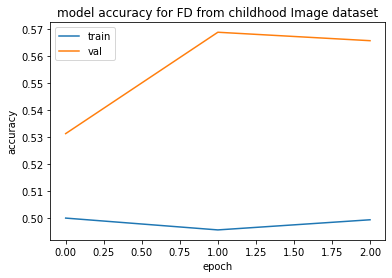

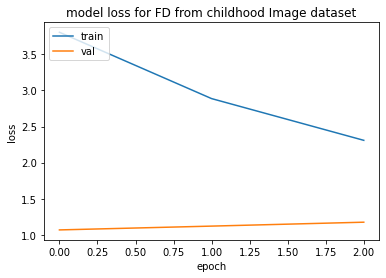

In [4]:
val_acc_per_epoch = history.history['val_acc']
val_loss_per_epoch = history.history['val_loss']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

print((max(val_acc_per_epoch)))
#fig = plt.figure(figsize=(15, 15))
history.epoch, history.history['acc'][-1]
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy for FD from childhood Image dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val',], loc='upper left')
#plt.legend(['Best epoch: %d' % (best_epoch,), (max(val_acc_per_epoch))])
plt.savefig("Inception_model_FD_acc_Hori_5_1.pdf", bbox_inches='tight')
#files.download("Fid.pdf")

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for FD from childhood Image dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.legend(['Best epoch: %d' % (best_epoch,), (min(val_loss_per_epoch))], loc='upper left')
#plt.legend(['train', 'val', 'Best epoch: %d' % (best_epoch,)])
plt.savefig("Inception_model_FD_loss_Hori_5_1.pdf", bbox_inches='tight')
plt.show()

In [24]:
import keras_tuner as kt
def model_builder(hp):
  model = keras.Sequential()
  #model.add(keras.layers.Flatten(input_shape=(1600, 256)))
  model.add(Dense(2048,input_dim=(512), activation='relu'))
  # Tune the number of units in the first Dense layer
  # Choose an optimal value between 32-512
  hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
  model.add(keras.layers.Dense(units=hp_units, activation='relu'))
  model.add(Dense(1024, activation='relu',kernel_regularizer=l2(0.0001)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu',kernel_regularizer=l2(0.0001)))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.0001)))
  model.add(Dropout(0.2))
  #model.add(Dense(128, activation='relu',kernel_regularizer=l2(0.001)))
  #model.add(Dropout(0.2))
  #model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.001)))
  #model.add(Dropout(0.2))
  #model.add(Dense(32, activation='relu',kernel_regularizer=l2(0.0001)))
  #model.add(Dropout(0.2))
  #model.add(Dense(64, activation='relu',kernel_regularizer=l2(0.0001)))
  #model.add(Dropout(0.2))
  model.add(keras.layers.Dense(1, activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=['accuracy'])
  #model.compile(optimizer=keras.optimizers.Adam(1e-5),  loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=["acc"])
  return model


tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=10,factor=3,directory='my_dir13',project_name='intro_to_kt')

In [25]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=50,  factor=3, directory='my_dir13', project_name='intro_to_kt')

In [26]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
# Train-test split, intentionally use shuffle=False
#X = X_train.reshape(-1,1)
X_train1, X_test_v, y_train, y_test_v = train_test_split(X_train, Y, test_size=0.10, shuffle=False)

In [27]:
print (X_train.shape)
#X_train=X_train.reshape((X_train.shape[1], X_train.shape[2]))
tuner.search(X_train1,y_train, epochs=50, validation_data= (X_test_v, y_test_v), callbacks=[stop_early])


# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]


print(f"""The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 89 Complete [00h 00m 08s]
val_accuracy: 0.706250011920929

Best val_accuracy So Far: 0.7437499761581421
Total elapsed time: 00h 05m 12s
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 448 and the optimal learning rate for the optimizer
is 0.0001.



In [28]:
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train1,y_train, epochs=50, validation_data= (X_test_v, y_test_v))

val_acc_per_epoch = history.history['val_accuracy']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/50
45/45 [==============================] - 1s 8ms/step - loss: 1.4674 - accuracy: 0.5431 - val_loss: 0.8043 - val_accuracy: 0.6062
Epoch 2/50
45/45 [==============================] - 0s 5ms/step - loss: 0.9350 - accuracy: 0.6201 - val_loss: 0.7780 - val_accuracy: 0.6187
Epoch 3/50
45/45 [==============================] - 0s 4ms/step - loss: 0.7971 - accuracy: 0.6750 - val_loss: 0.7330 - val_accuracy: 0.6375
Epoch 4/50
45/45 [==============================] - 0s 5ms/step - loss: 0.7432 - accuracy: 0.7035 - val_loss: 0.7281 - val_accuracy: 0.7125
Epoch 5/50
45/45 [==============================] - 0s 5ms/step - loss: 0.7270 - accuracy: 0.6993 - val_loss: 0.7131 - val_accuracy: 0.6625
Epoch 6/50
45/45 [==============================] - 0s 4ms/step - loss: 0.6998 - accuracy: 0.7118 - val_loss: 0.7574 - val_accuracy: 0.6812
Epoch 7/50
45/45 [==============================] - 0s 4ms/step - loss: 0.6561 - accuracy: 0.7424 - val_loss: 0.6947 - val_accuracy: 0.6812
Epoch 8/50
45/45 [==

10/10 [==============================] - 0s 3ms/step - loss: 0.6779 - accuracy: 0.8750
[test loss, test accuracy]: [0.6778908371925354, 0.875]
10/10 - 0s - loss: 0.6779 - accuracy: 0.8750 - 34ms/epoch - 3ms/step
10/10 [==============================] - 0s 2ms/step
[1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,

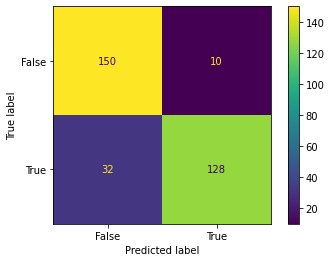

              precision    recall  f1-score   support

           0       0.82      0.94      0.88       160
           1       0.93      0.80      0.86       160

    accuracy                           0.87       320
   macro avg       0.88      0.87      0.87       320
weighted avg       0.88      0.87      0.87       320

0.86875
0.927536231884058
{'Accuracy': 0.86875, 'Precision': 0.927536231884058, 'Sensitivity_recall': 0.8, 'Specificity': 0.9375, 'F1_score': 0.8590604026845639}


In [29]:
val_result = model.evaluate(TEST_X, Y_test)
print("[test loss, test accuracy]:", val_result)
#from keras.models import load_model
#model = load_model('/content/my_model_1000 (1).h5')

#TEST_X=np.array(X_test)
#Y_test=np.array(Y_test1)

#loss, acc = model.evaluate(X_train,Y,verbose=2)
loss, acc = model.evaluate(TEST_X, Y_test, verbose=2)
predictions = model.predict(TEST_X)
#y_pred = (predictions > 0.5)

y_pred=[]
for i in range(len(predictions)):
  if predictions[i] > 0.989:
    y_pred.append(1)
  else:
    y_pred.append(0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

print (y_pred)
#matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print (len(Y_test))

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

from sklearn.metrics import classification_report
 
print(classification_report(Y_test, y_pred))

Accuracy = metrics.accuracy_score(Y_test, y_pred)
print (Accuracy)

Precision = metrics.precision_score(Y_test, y_pred)
print (Precision)

Sensitivity_recall = metrics.recall_score(Y_test, y_pred)

Specificity = metrics.recall_score(Y_test, y_pred, pos_label=0)

F1_score = metrics.f1_score(Y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

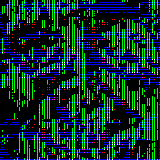

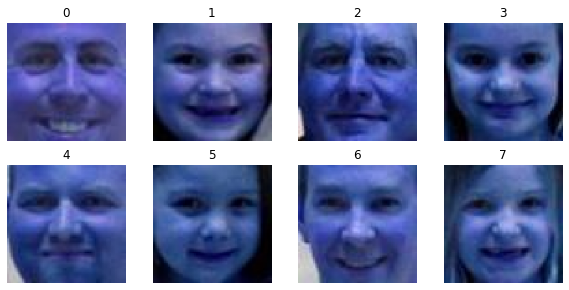

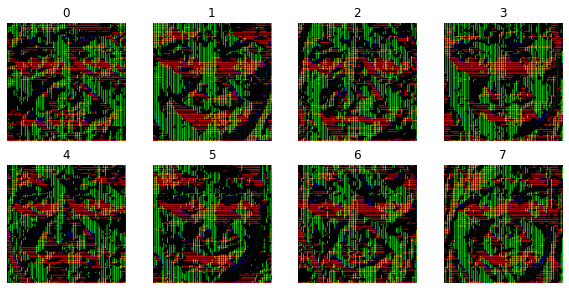

In [ ]:
from google.colab.patches import cv2_imshow
plt.figure(figsize=(10, 10))
for n in range(8):
    ax = plt.subplot(4, 4, n + 1)
    plt.imshow(Images[n])
    plt.imshow(Images[n])
    plt.title(n)
    plt.axis("off")

plt.figure(figsize=(10, 10))
for n in range(8):
    ax = plt.subplot(4, 4, n + 1)
    plt.imshow(fd[n])
    plt.title(n)
    plt.axis("off")    
cv2_imshow(fd[0])   

In [ ]:
pip install visualkeras

In [ ]:
from tensorflow.keras.utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
#model.summary()
import visualkeras



#visualkeras.layered_view(model) 
#from PIL import ImageFont

#from PIL import ImageFont
#visualkeras.layered_view(model, type_ignore=[ Activation, Concatenate,Dropout, Flatten, Dense])

#visualkeras.layered_view(model, type_ignore=[ Concatenate,Dropout, Flatten], scale_xy=10, scale_z=10, max_z=1000)

#from collections import defaultdict

#color_map = defaultdict(dict)
#color_map[layers.Conv2D]['fill'] = 'orange'
#color_map[layers.MaxPooling2D]['fill'] = 'red'
#color_map[layers.Dense]['fill'] = 'black'
#color_map[layers.Flatten]['fill'] = 'teal'
#visualkeras.layered_view(model, legend=True, color_map=color_map) 

(2, 256)


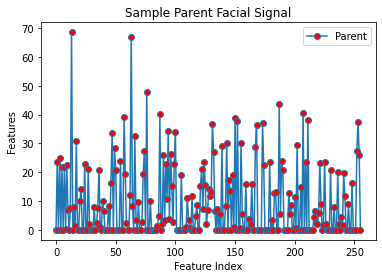

In [ ]:
v=newTrainX[0,0:]
v1=np.concatenate((index,v.T), axis=None)
v2=np.reshape(v1,(2,256))
print (v2.shape)
plt.plot(*zip(*itertools.chain.from_iterable(itertools.combinations(v2.T,1))), marker='o', markerfacecolor='red', label='Parent')
plt.title('Sample Parent Facial Signal')
# x label
plt.xlabel('Feature Index')
# y label
plt.ylabel('Features')
plt.legend()
plt.savefig('Sample parent.jpg',dpi=500)
plt.show()

(256,)
(512,)
(2, 256)
(2, 256)


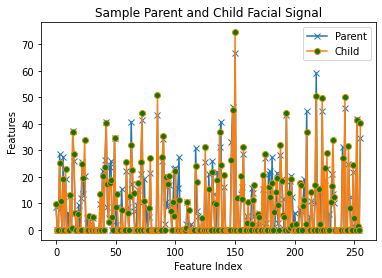

In [ ]:
import itertools
v=newTrainX[0,0:]
index=np.arange(len(newTrainX[0,0:256]))
print (v.shape)
v1=np.concatenate((index,v.T), axis=None)
print (v1.shape)
v2=np.reshape(v1,(2,256))
print (v2.shape)
plt.plot(*zip(*itertools.chain.from_iterable(itertools.combinations(v2.T,1))), marker='x', markerfacecolor='red', label='Parent')
plt.title('Sample Parent Facial Signal')
# x label
plt.xlabel('Feature Index')
# y label
plt.ylabel('Features')
plt.legend()
#plt.savefig('Sample Parent_Feature_Signal.jpg',dpi=300)
#plt.show()
v=newTrainX[1,0:]
v1=np.concatenate((index,v.T), axis=None)
v2=np.reshape(v1,(2,256))
print (v2.shape)
plt.plot(*zip(*itertools.chain.from_iterable(itertools.combinations(v2.T,1))), marker='o', markerfacecolor='green', label='Child')
plt.title('Sample Parent and Child Facial Signal')
# x label
plt.xlabel('Feature Index')
# y label
plt.ylabel('Features')
plt.legend()
plt.savefig('Sample Parent_CH.jpg',dpi=300)
plt.show()


In [ ]:
#np.save('facenet_swt_ch',newTrainX)
print(newTrainX.shape)

(2008, 256)


In [ ]:
#print(grayscale_batch.shape)  # (64, 224, 224)
#rgb_batch = np.repeat(grayscale_batch[..., np.newaxis], 3, -1)
#print(rgb_batch.shape)  # (64, 224, 224, 3)

import cv2
import numpy as np
import os
import random
#import swt_images

from numpy import asarray
from numpy import expand_dims
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract,Add

import zipfile
import os
import cv2
import matplotlib.pyplot as plt
local_zip = '/content/Testing_Dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

print(len(os.listdir('/tmp/Testing_Dataset/Folder1')))
path1='/tmp/Testing_Dataset/Folder1'
folder=path1

#path1= 'E:/Madhu_0110/SWT_CODE_0811_1/SWT_CODE/images/images'
#path1='E:/Madhu_0110/SWT_CODE_0811_1/SWT_CODE/YCCH_images'
folder=path1
mylist=np.sort(os.listdir(path1))
print (len(mylist))



fd_test=[]
#print mylist
Image_index=[]
Image_index1=[]
f_cnt=0
Images=[]
for filename in mylist:
    img1 = cv2.imread(os.path.join(folder,filename))
    img1=cv2.resize(img1, (160, 160),interpolation = cv2.INTER_NEAREST)
    #print (img1.shape)
    #print (madhu)
    fd1= swt_features(img1)
    Images.append(img1)
    #print (fd1.shape)
    #print (madhu)
    #fd2=expand_dims(fd1, axis=0)
    #print (fd2.shape)
    #fd3=fd2.repeat(3, axis=-1)
    #print (fd3.shape)
    fd_test.append(fd1)
    #print (madhu)



# convert each face in the train set to an embedding
newTrainX_test = list()
for image in fd_test:
	#embedding = get_embedding(model, face_pixels)
	image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
	# prepare the image for the VGG model
	image = preprocess_input(image)
	embedding = model.predict(image)
	newTrainX_test.append(embedding[0])
newTrainX_test = asarray(newTrainX_test)
print(newTrainX_test.shape)

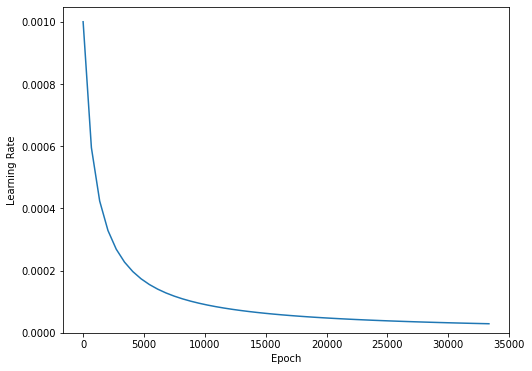

In [ ]:
BATCH_SIZE = 500
STEPS_PER_EPOCH = 1600//BATCH_SIZE
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(0.001, decay_steps=STEPS_PER_EPOCH*1000, decay_rate=1, staircase=False)

def get_optimizer():
  return tf.keras.optimizers.Adam(lr_schedule)

step = np.linspace(0,100000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')  

#loss=tf.keras.losses.BinaryCrossentropy(from_logits=True)

def compile_and_fit(model, name, optimizer=None, max_epochs=10000):
  if optimizer is None:
    optimizer = get_optimizer()
  #model.compile(optimizer=optimizer,loss=tf.keras.losses.BinaryFocalLoss(gamma=2), metrics=[tf.keras.losses.BinaryFocalLoss(gamma=2, name='binary_crossentropy'),'accuracy'])
  model.compile(optimizer=optimizer,loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), metrics=[tf.keras.losses.BinaryCrossentropy(from_logits=True, name='binary_crossentropy'),'accuracy'])
  model.summary()

  history = model.fit(X_train,steps_per_epoch = STEPS_PER_EPOCH, epochs=max_epochs,validation_data=TEST_X,verbose=0)
  return history

In [ ]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
# normalize input vectors
transformer = Normalizer().fit(newTrainX_test)  # fit does nothing.
newTrainX_n=transformer.transform(newTrainX_test)
print (newTrainX_n.shape)
from sklearn.decomposition import PCA

import numpy as np
import tensorflow as tf
from tensorflow import keras

from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract,Add
from keras.models import Model
from tensorflow.keras.optimizers import Adam # - Works
from tensorflow.keras.optimizers import SGD
from keras.layers import Input, Dense, GlobalMaxPool2D, GlobalAvgPool2D, Concatenate, Multiply, Dropout, Subtract,Add

#NCOMPONENTS = 50

#pca = PCA(n_components=NCOMPONENTS)
#X_pca_train = pca.fit_transform(newTrainX_n)
#print(X_pca_train.shape)

trainX_test=newTrainX_test

###PAIR SHUFFLING
#trainX=X_pca_train


print (len(trainX_test))

##from sklearn.decomposition import FastICA
#ica = FastICA(n_components=50)
#trainX = ica.fit_transform(trainX)



D=[]

P_fd=np.zeros_like(trainX_test[0:int(trainX_test.shape[0]/2),:])
C_fd=np.zeros_like(trainX_test[0:int(trainX_test.shape[0]/2),:])
sep=0
cnt=0

while sep<(len(trainX_test)):
	P_fd[cnt]=trainX_test[sep]  ##parent features
	C_fd[cnt]=trainX_test[sep+1] ## children features
	sep=sep+2
	cnt=cnt+1
#P_fd=P_fd[0:int(trainX.shape[0]/2),:]
#C_fd=C_fd[0:int(trainX.shape[0]/2),:]
print (P_fd.shape)
KIN_FEATURES=[]
for i in range(P_fd.shape[0]):
  x1=P_fd[i]
  x2=C_fd[i]
  x3 = Subtract()([x1, x2])
  KIN_FEATURES.append(list(np.square(x3)))

 

KIN_FEATURES=np.reshape(KIN_FEATURES, (len(KIN_FEATURES),len(KIN_FEATURES[0])))

print (KIN_FEATURES.shape)

##Kin thrshold

 
print (len(KIN_FEATURES[0]))

NON_KIN_FEATURES_1=[]

for i in range(P_fd.shape[0]):
  R=random.randint(0,47)
  S=random.randint(0,47)
  x1=P_fd[R]
  x2=C_fd[S]
  x3 = Subtract()([x1, x2])
  NON_KIN_FEATURES_1.append(list(np.square(x3)))


NON_KIN_FEATURES_1=np.reshape(NON_KIN_FEATURES_1,(P_fd.shape[0], len(KIN_FEATURES[0])))
	 	


X=[]
for i  in range(KIN_FEATURES.shape[0]):
  X.append(KIN_FEATURES[i,:])
  X.append(NON_KIN_FEATURES_1[i,:])

Y_test1=[]

for i in range(KIN_FEATURES.shape[0]):
  Y_test1.append(1)
  Y_test1.append(0)



X_test=np.reshape(X, (len(X), len(X[0])))

print (len(Y_test1))
print (X_test.shape)



(96, 256)
96
(48, 256)
(48, 256)
256
96
(96, 256)


In [ ]:
 !pip install focal-loss

10/10 [==============================] - 0s 3ms/step - loss: 2.2687 - acc: 0.7469
[test loss, test accuracy]: [2.268723726272583, 0.746874988079071]
10/10 - 0s - loss: 2.2687 - acc: 0.7469 - 33ms/epoch - 3ms/step
10/10 [==============================] - 0s 2ms/step
[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1

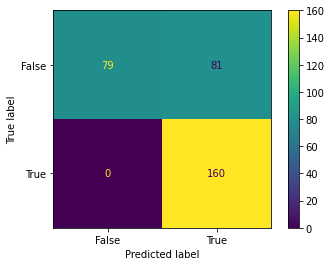

              precision    recall  f1-score   support

           0       1.00      0.49      0.66       160
           1       0.66      1.00      0.80       160

    accuracy                           0.75       320
   macro avg       0.83      0.75      0.73       320
weighted avg       0.83      0.75      0.73       320



10/10 [==============================] - 0s 3ms/step


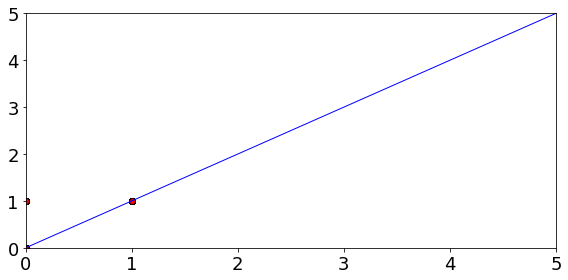

In [ ]:
test_predictions = model.predict(TEST_X)
test_labels = Y_test

fig, ax = plt.subplots(figsize=(8,4))
plt.scatter(test_labels, y_pred, alpha=0.6, 
            color='#FF0000', lw=1, ec='black')
lims = [0, 5]

plt.plot(lims, lims, lw=1, color='#0000FF')
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlim(lims)
plt.ylim(lims)

plt.tight_layout()
plt.show()

In [ ]:
class PerformancePlotCallback(keras.callbacks.Callback):
    def __init__(self, x_test, y_test, model_name):
        self.x_test = x_test
        self.y_test = y_test
        self.model_name = model_name
        
    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x_test)
        fig, ax = plt.subplots(figsize=(8,4))
        plt.scatter(y_test, y_pred, alpha=0.6, 
            color='#FF0000', lw=1, ec='black')
        
        lims = [0, 5]

        plt.plot(lims, lims, lw=1, color='#0000FF')
        plt.ticklabel_format(useOffset=False, style='plain')
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.xlim(lims)
        plt.ylim(lims)

        plt.tight_layout()
        plt.title(f'Prediction Visualization Keras Callback - Epoch: {epoch}')
        plt.savefig('model_train_images/'+self.model_name+"_"+str(epoch))
        plt.close()


checkpoint = keras.callbacks.ModelCheckpoint("california.h5", save_best_only=True)
performance = PerformancePlotCallback(X_test, Y_test, "california_model")



NameError: ignored

10/10 - 0s - loss: 2.5493 - acc: 0.7312 - 33ms/epoch - 3ms/step
10/10 [==============================] - 0s 2ms/step
[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 

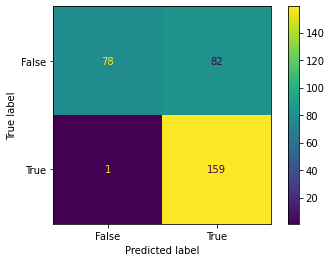

In [ ]:
#from keras.models import load_model
#model = load_model('/content/my_model_1000 (1).h5')

#TEST_X=np.array(X_test)
#Y_test=np.array(Y_test1)

#loss, acc = model.evaluate(X_train,Y,verbose=2)
loss, acc = model.evaluate(TEST_X, Y_test, verbose=2)
predictions = model.predict(TEST_X)
#y_pred = (predictions > 0.5)

y_pred=[]
for i in range(len(predictions)):
  if predictions[i] > 0.6:
    y_pred.append(1)
  else:
    y_pred.append(0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

print (y_pred)
#matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print (len(Y_test))

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()





In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.41      0.48       160
           1       0.55      0.72      0.62       160

    accuracy                           0.56       320
   macro avg       0.57      0.56      0.55       320
weighted avg       0.57      0.56      0.55       320



In [ ]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# train the model
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, Y)
y_pred = knn.predict(TEST_X)
 
# compute accuracy of the model
knn.score(TEST_X, Y_test)

0.5625

In [ ]:
!pip install keras-tuner --upgrade

Best epoch: 10
0.7749999761581421


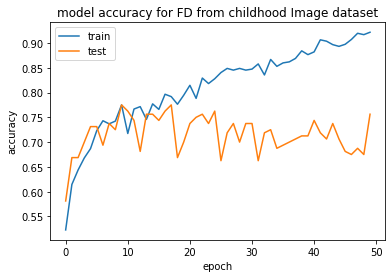

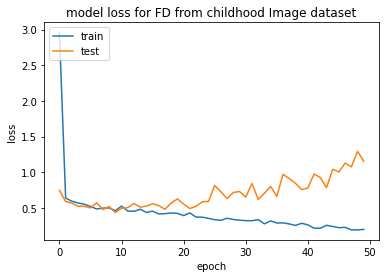

In [ ]:
val_acc_per_epoch = history.history['val_accuracy']
val_loss_per_epoch = history.history['val_loss']
best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

print((max(val_acc_per_epoch)))
#fig = plt.figure(figsize=(15, 15))
history.epoch, history.history['accuracy'][-1]
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy for FD from childhood Image dataset')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test',], loc='upper left')
#plt.legend(['Best epoch: %d' % (best_epoch,), (max(val_acc_per_epoch))])
plt.savefig("Inception_model_FD_acc_Hori_5_1.pdf", bbox_inches='tight')
#files.download("Fid.pdf")

plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss for FD from childhood Image dataset')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.legend(['Best epoch: %d' % (best_epoch,), (min(val_loss_per_epoch))], loc='upper left')
#plt.legend(['train', 'val', 'Best epoch: %d' % (best_epoch,)])
plt.savefig("Inception_model_FD_loss_Hori_5_1.pdf", bbox_inches='tight')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               65792     
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 dense_6 (Dense)             (None, 640)               328320    
                                                                 
 dense_7 (Dense)             (None, 1)                 641       
                                                                 
Total params: 526,337
Trainable params: 526,337
Non-trainable params: 0
_________________________________________________________________


10/10 [==============================] - 0s 13ms/step - loss: 0.7293 - accuracy: 0.7625
[test loss, test accuracy]: [0.7293343544006348, 0.762499988079071]
10/10 - 0s - loss: 0.7293 - accuracy: 0.7625 - 191ms/epoch - 19ms/step
10/10 [==============================] - 0s 10ms/step
[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1

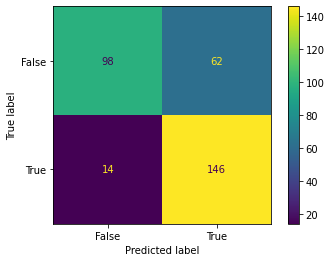

              precision    recall  f1-score   support

           0       0.88      0.61      0.72       160
           1       0.70      0.91      0.79       160

    accuracy                           0.76       320
   macro avg       0.79      0.76      0.76       320
weighted avg       0.79      0.76      0.76       320

0.7625
0.7019230769230769
{'Accuracy': 0.7625, 'Precision': 0.7019230769230769, 'Sensitivity_recall': 0.9125, 'Specificity': 0.6125, 'F1_score': 0.7934782608695653}


In [ ]:
val_result = model.evaluate(TEST_X, Y_test)
print("[test loss, test accuracy]:", val_result)
#from keras.models import load_model
#model = load_model('/content/my_model_1000 (1).h5')

#TEST_X=np.array(X_test)
#Y_test=np.array(Y_test1)

#loss, acc = model.evaluate(X_train,Y,verbose=2)
loss, acc = model.evaluate(TEST_X, Y_test, verbose=2)
predictions = model.predict(TEST_X)
#y_pred = (predictions > 0.5)

y_pred=[]
for i in range(len(predictions)):
  if predictions[i] > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

print (y_pred)
#matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print (len(Y_test))

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

from sklearn.metrics import classification_report
 
print(classification_report(Y_test, y_pred))

Accuracy = metrics.accuracy_score(Y_test, y_pred)
print (Accuracy)

Precision = metrics.precision_score(Y_test, y_pred)
print (Precision)

Sensitivity_recall = metrics.recall_score(Y_test, y_pred)

Specificity = metrics.recall_score(Y_test, y_pred, pos_label=0)

F1_score = metrics.f1_score(Y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)

# Retrain the model
#hypermodel.fit(X_train,Y, epochs=best_epoch, validation_split=0.2)
history = hypermodel.fit(X_train,Y, epochs=best_epoch, validation_data= (TEST_X, Y_test))
#history = model.fit(X_train,Y, epochs=100, validation_data= (TEST_X, Y_test))

Epoch 1/136
50/50 [==============================] - 1s 5ms/step - loss: 21.8745 - accuracy: 0.5200 - val_loss: 1.7511 - val_accuracy: 0.5875
Epoch 2/136
50/50 [==============================] - 0s 3ms/step - loss: 0.8576 - accuracy: 0.7513 - val_loss: 1.3164 - val_accuracy: 0.6625
Epoch 3/136
50/50 [==============================] - 0s 3ms/step - loss: 0.2422 - accuracy: 0.9062 - val_loss: 1.6418 - val_accuracy: 0.6812
Epoch 4/136
50/50 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.9887 - val_loss: 1.5393 - val_accuracy: 0.6875
Epoch 5/136
50/50 [==============================] - 0s 3ms/step - loss: 0.0195 - accuracy: 0.9994 - val_loss: 1.5191 - val_accuracy: 0.6938
Epoch 6/136
50/50 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9994 - val_loss: 1.5807 - val_accuracy: 0.6812
Epoch 7/136
50/50 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 0.9994 - val_loss: 1.7610 - val_accuracy: 0.6750
Epoch 8/136


10/10 [==============================] - 0s 2ms/step - loss: 2.2098 - accuracy: 0.7406
[test loss, test accuracy]: [2.209763765335083, 0.7406250238418579]
10/10 - 0s - loss: 2.2098 - accuracy: 0.7406 - 29ms/epoch - 3ms/step
10/10 [==============================] - 0s 2ms/step
[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

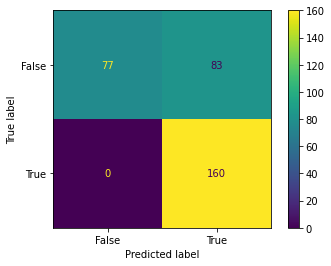

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       160
           1       0.66      1.00      0.79       160

    accuracy                           0.74       320
   macro avg       0.83      0.74      0.72       320
weighted avg       0.83      0.74      0.72       320



In [ ]:
eval_result = hypermodel.evaluate(TEST_X, Y_test)
print("[test loss, test accuracy]:", eval_result)
#from keras.models import load_model
#model = load_model('/content/my_model_1000 (1).h5')

#TEST_X=np.array(X_test)
#Y_test=np.array(Y_test1)

#loss, acc = model.evaluate(X_train,Y,verbose=2)
loss, acc = hypermodel.evaluate(TEST_X, Y_test, verbose=2)
predictions = hypermodel.predict(TEST_X)
#y_pred = (predictions > 0.5)

y_pred=[]
for i in range(len(predictions)):
  if predictions[i] > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

print (y_pred)
#matrix = metrics.confusion_matrix(Y_test.argmax(axis=1), y_pred.argmax(axis=1))

print (len(Y_test))

confusion_matrix = metrics.confusion_matrix(Y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

from sklearn.metrics import classification_report
 
print(classification_report(Y_test, y_pred))


In [ ]:
Accuracy = metrics.accuracy_score(Y_test, y_pred)
print (Accuracy)

Precision = metrics.precision_score(Y_test, y_pred)
print (Precision)

Sensitivity_recall = metrics.recall_score(Y_test, y_pred)

Specificity = metrics.recall_score(Y_test, y_pred, pos_label=0)

F1_score = metrics.f1_score(Y_test, y_pred)
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

0.740625
0.6584362139917695
{'Accuracy': 0.740625, 'Precision': 0.6584362139917695, 'Sensitivity_recall': 1.0, 'Specificity': 0.48125, 'F1_score': 0.7940446650124069}


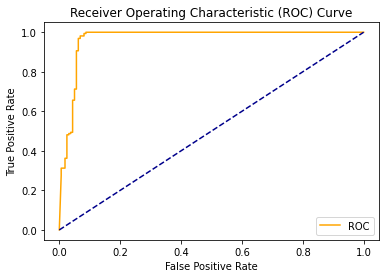

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc score
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

fpr, tpr, thresholds = roc_curve(Y_test, predictions)
plot_roc_curve(fpr, tpr)

Logistic: f1=0.907 auc=0.915


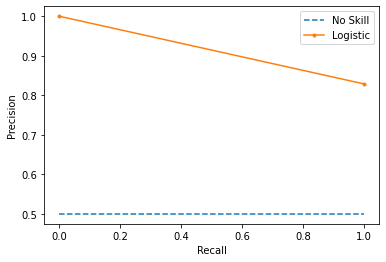

In [ ]:
# precision-recall curve and f1
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
# predict class values

lr_precision, lr_recall, _ = precision_recall_curve(Y_test, y_pred)
lr_f1, lr_auc = f1_score(Y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(Y_test[Y_test==1]) / len(Y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

(512, 256)


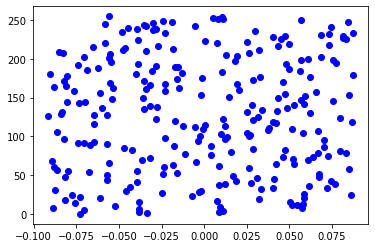

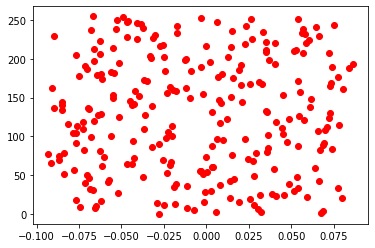

In [ ]:
a= np.array(model.layers[4].weights[0])
print(a.shape)

b=np.arange(256)

plt.scatter(a[0,:],b, c ="blue")
#plt.scatter(a[511,:], b, c ="red")
 
# To show the plot
plt.show()

plt.scatter(a[511,:], b, c ="red")
 
# To show the plot
plt.show()



#print(model.layers[0].bias.numpy())
#print(model.layers[0].bias_initializer)

14


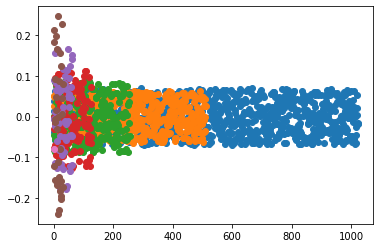

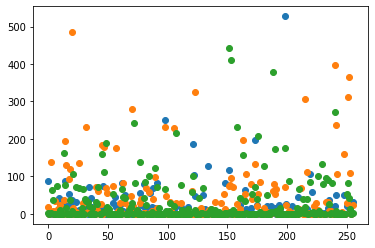

In [ ]:
#for layer in model.layers:
    #weights = layer.get_weights() # list of numpy arrays

weights = model.get_weights()

#from keras.utils.vis_utils import plot_model
#plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
import matplotlib.pyplot as plt
print (len(weights))
for i in range(len(weights)):
  y=weights[i]
  if i%2==0:
    x=np.arange(start=0, stop=len(y[i]), step=1)  
    plt.scatter(x,y[i])
#plt.scatter(x,X_train[2])
#plt.scatter(X_train[3],x)
plt.show()

y=X_train[0]
x=np.arange(start=0, stop=len(y), step=1) 
plt.scatter(x,y)

y=X_train[1]
x=np.arange(start=0, stop=len(y), step=1) 
plt.scatter(x,y)

y=X_train[3]
x=np.arange(start=0, stop=len(y), step=1) 
plt.scatter(x,y)
plt.show()

>1, train: 0.579, test: 0.556
>2, train: 0.638, test: 0.634
>3, train: 0.664, test: 0.641
>4, train: 0.699, test: 0.659
>5, train: 0.734, test: 0.672
>6, train: 0.779, test: 0.700
>7, train: 0.820, test: 0.728
>8, train: 0.854, test: 0.728
>9, train: 0.892, test: 0.744
>10, train: 0.927, test: 0.756
>11, train: 0.948, test: 0.800
>12, train: 0.963, test: 0.809
>13, train: 0.971, test: 0.806
>14, train: 0.975, test: 0.819
>15, train: 0.984, test: 0.781
>16, train: 0.989, test: 0.816
>17, train: 0.991, test: 0.825
>18, train: 0.998, test: 0.822
>19, train: 0.998, test: 0.812


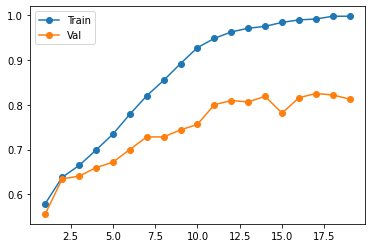

In [ ]:
# evaluate decision tree performance on train and test sets with different tree depths
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# create dataset
#X, y = make_classification(n_samples=10000, n_features=20, n_informative=5, n_redundant=15, random_state=1)
# split into train test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 20)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i)
	# fit model on the training dataset
	model.fit(X_train, Y)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(Y, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(TEST_X)
	test_acc = accuracy_score(Y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Val')
pyplot.legend()
pyplot.show()

In [ ]:

X_train2=np.zeros_like(X_train)
for i in range(X_train.shape[0]):
    X_train2[i,:]=np.square(X_train[i,:])


print (X_train.shape[0])
X_train_f=[]

for i in range(X_train.shape[0]):
    a=X_train[i,:]
    b=X_train2[i,:]
    c=np.concatenate((a,b), axis=-1)
    X_train_f.append(c)

print (len(X_train_f[0]))
X_train21=np.reshape(X_train_f,(len(X_train_f),len(X_train_f[0])))
print (X_train21.shape)

TEST_X2=np.zeros_like(TEST_X)
for i in range(TEST_X.shape[0]):
    TEST_X2[i,:]=np.square(TEST_X[i,:])


print (TEST_X.shape[0])
TEST_X_f=[]

for i in range(TEST_X.shape[0]):
    a=TEST_X[i,:]
    b=TEST_X2[i,:]
    c=np.concatenate((a,b), axis=-1)
    TEST_X_f.append(c)

print (len(TEST_X_f[0]))
TEST_X21=np.reshape(TEST_X_f,(len(TEST_X_f),len(TEST_X_f[0])))
print (TEST_X21.shape)





1600
512
(1600, 512)
320
512
(320, 512)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


Param: 0.100000, Train: 1.000, Test: 0.728
Param: 0.010000, Train: 1.000, Test: 0.781
Param: 0.001000, Train: 1.000, Test: 0.766
Param: 0.000100, Train: 1.000, Test: 0.756
Param: 0.000010, Train: 1.000, Test: 0.772
Param: 0.000001, Train: 1.000, Test: 0.784


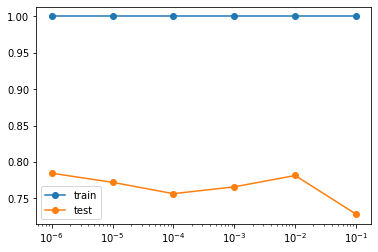

In [ ]:
# grid search regularization values for moons dataset
from sklearn.datasets import make_moons
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import l2
from matplotlib import pyplot

values = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
all_train, all_test = list(), list()
for param in values:
	# define model
  model = keras.Sequential()
  model.add(Dense(1024,input_dim=(256), activation='relu',kernel_regularizer=l2(param)))
  model.add(Dropout(0.2))
  model.add(Dense(512, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
  
	#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.compile(optimizer=keras.optimizers.Adam(1e-5),  loss=keras.losses.BinaryCrossentropy(from_logits=True), metrics=["acc"])
	# fit model
  model.fit(X_train, Y, epochs=1000, verbose=0)
	# evaluate the model
  _, train_acc = model.evaluate(X_train, Y, verbose=0)
  _, test_acc = model.evaluate(TEST_X, Y_test, verbose=0)
  print('Param: %f, Train: %.3f, Test: %.3f' % (param, train_acc, test_acc))
  all_train.append(train_acc)
  all_test.append(test_acc)
# plot train and test means
pyplot.semilogx(values, all_train, label='train', marker='o')
pyplot.semilogx(values, all_test, label='test', marker='o')
pyplot.legend()
pyplot.show()

In [ ]:
from keras.models import load_model
model.save('my_model_1000(1).h5') 
#model = load_model('my_model.h5')

In [ ]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
         
    """
          
    ### START CODE HERE ### 
    
    g=1/(1+np.exp(-z))
    
    ### END SOLUTION ###  
    
    return g


def compute_cost(X, y, w, b, lambda_= 1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : scalar Values of bias parameter of the model
      lambda_: unused placeholder
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    ### START CODE HERE ###
    
    loss_sum = 0
    
    for i in range(m):
        z_wb = 0 
        
        for j in range(n):
            z_wb_ij= w[j] * X[i,j]
            z_wb += z_wb_ij
            
                    
        z_wb += b
        
        f_wb = sigmoid(z_wb)
        
        loss =  -y[i] * np.log(f_wb) - (1 - y[i]) * np.log(1 - f_wb)
            
        loss_sum += loss
            
    total_cost = (1 / m) * loss_sum
    
    ### END CODE HERE ### 

    return total_cost

def compute_cost_reg(X, y, w, b, lambda_ = 1):
    """
    Computes the cost over all examples
    Args:
      X : (array_like Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value 
      w : (array_like Shape (n,)) Values of parameters of the model      
      b : (array_like Shape (n,)) Values of bias parameter of the model
      lambda_ : (scalar, float)    Controls amount of regularization
    Returns:
      total_cost: (scalar)         cost 
    """

    m, n = X.shape
    
    # Calls the compute_cost function that you implemented above
    cost_without_reg = compute_cost(X, y, w, b) 
    
    # You need to calculate this value
    reg_cost = 0.
    
    ### START CODE HERE ###

             

    reg_cost = 0
    for j in range(n):        
        reg_cost_j = (w[j]**2) 
        reg_cost = reg_cost + reg_cost_j    #scalar

        
    ### END CODE HERE ### 
    
    # Add the regularization cost to get the total cost
    total_cost = cost_without_reg + (lambda_/(2 * m)) * reg_cost

    return total_cost





def compute_gradient(X, y, w, b, lambda_=None): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X : (ndarray Shape (m,n)) variable such as house size 
      y : (array_like Shape (m,1)) actual value 
      w : (array_like Shape (n,1)) values of parameters of the model      
      b : (scalar)                 value of parameter of the model 
      lambda_: unused placeholder.
    Returns
      dj_dw: (array_like Shape (n,1)) The gradient of the cost w.r.t. the parameters w. 
      dj_db: (scalar)                The gradient of the cost w.r.t. the parameter b. 
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0.

    ### START CODE HERE ### 
    for i in range(m):
        f_wb = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        dj_db_i  = f_wb  - y[i] 
        
        dj_db += dj_db_i
        
        for j in range(n):
            dj_dw_ij = (f_wb - y[i])* X[i][j]
            dj_dw[j] += dj_dw_ij
    
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
       
 
    ### END CODE HERE ###

        
    return dj_db, dj_dw

def compute_gradient_reg(X, y, w, b, lambda_ = 1): 
    """
    Computes the gradient for linear regression 
 
    Args:
      X : (ndarray Shape (m,n))   variable such as house size 
      y : (ndarray Shape (m,))    actual value 
      w : (ndarray Shape (n,))    values of parameters of the model      
      b : (scalar)                value of parameter of the model  
      lambda_ : (scalar,float)    regularization constant
    Returns
      dj_db: (scalar)             The gradient of the cost w.r.t. the parameter b. 
      dj_dw: (ndarray Shape (n,)) The gradient of the cost w.r.t. the parameters w. 

    """
    m, n = X.shape
    
    dj_db, dj_dw = compute_gradient(X, y, w, b)

    ### START CODE HERE ### 

    for j in range(n):
        dj_dw_j_reg = (lambda_ / m) * w[j]      

        dj_dw[j] = dj_dw[j] + dj_dw_j_reg
    
        
    ### END CODE HERE ###         
        
    return dj_db, dj_dw    




def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X :    (array_like Shape (m, n)
      y :    (array_like Shape (m,))
      w_in : (array_like Shape (n,))  Initial values of parameters of the model
      b_in : (scalar)                 Initial value of parameter of the model
      cost_function:                  function to compute cost
      alpha : (float)                 Learning rate
      num_iters : (int)               number of iterations to run gradient descent
      lambda_ (scalar, float)         regularization constant
      
    Returns:
      w : (array_like Shape (n,)) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    
    # number of training examples
    m = len(X)
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w_history = []
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in, lambda_)   

        # Update Parameters using w, b, alpha and gradient
        w_in = w_in - alpha * dj_dw               
        b_in = b_in - alpha * dj_db              
       
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0 or i == (num_iters-1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w_in, b_in, J_history, w_history #return w and J,w history for graphing






In [ ]:
import math
np.random.seed(1)
intial_w = 0.01 * (np.random.rand(256).reshape(-1,1) - 0.5)
initial_b = -1
#X_train=np.reshape(X, (len(X), len(X[0])))
#X_train=X_train[0:1000,:]
#Y=np.array(Y[0:1000])
#print (len(X_train))
lambda_ = 0.1
# Some gradient descent settings
iterations = 10000
alpha = 0.001






w,b, J_history,_ = gradient_descent(X_train, Y, intial_w, initial_b,compute_cost_reg, compute_gradient_reg, alpha, iterations, lambda_)

Iteration    0: Cost     0.88   


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


KeyboardInterrupt: ignored

In [ ]:
np.save('trained_weights',w)

np.save('trained_bias',b)


In [ ]:
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic
    regression parameters w
    
    Args:
    X : (ndarray Shape (m, n))
    w : (array_like Shape (n,))      Parameters of the model
    b : (scalar, float)              Parameter of the model

    Returns:
    p: (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    # number of training examples
    m, n = X.shape   
    p = np.zeros(m)
   
    ### START CODE HERE ### 
    # Loop over each example
    for i in range(m):   
        z_wb = 0
        # Loop over each feature
        for j in range(n): 
            # Add the corresponding term to z_wb
            z_wb_ij = X[i, j] * w[j]
            z_wb += z_wb_ij
         
        
        
        # Add bias term 
        z_wb += b
        
        # Calculate the prediction for this example
        f_wb = sigmoid(z_wb)

        # Apply the threshold
        
        if  f_wb >= 0.5 :
            p[i] = 1
        else:
            p[i] = 0
            
        
    ### END CODE HERE ### 
    return p

p = predict(X_train, w,b)

#Y_test= np.array()
print (p)
print (w)

print('Train Accuracy: %f'%(np.mean(p == Y) * 100))

In [ ]:
X_train=np.reshape(X, (len(X), len(X[0])))
testX=trainY
print (testX.shape)

P_test=np.zeros_like(testX)
C_test=np.zeros_like(testX)
sep=0
cnt=0

while sep<(len(testX)):
	P_test[cnt]=testX[sep]  ##parent features
	C_test[cnt]=testX[sep+1] ## children features
	sep=sep+2
	cnt=cnt+1
P_test=P_test[0:int(testX.shape[0]/2),:]
C_test=C_test[0:int(testX.shape[0]/2),:]
print (C_test.shape)

testX_a=np.zeros_like(P_test)
testX_b=np.zeros_like(C_test)
TEST_PAIR_FEATURES_1=np.zeros((P_test.shape[0],P_test.shape[0],P_test.shape[1]))
for i in range(P_test.shape[0]):
  P=P_test[i,:]
  for j in range(P_test.shape[0]):
    C=C_test[j,:]
    x3 = np.subtract(P, C)
    TEST_PAIR_FEATURES_1[i,j,:]=list(np.square(x3))



SEL_KIN_PAIRS=np.zeros_like(P_test)

SEL_NKN_KIN_PAIRS=np.zeros_like(P_test)

for i in range(TEST_PAIR_FEATURES_1.shape[0]):
    for j in range(TEST_PAIR_FEATURES_1.shape[0]):
      if i==j:
        SEL_KIN_PAIRS[i,:]=TEST_PAIR_FEATURES_1[i,j,:]
      else:
        SEL_NKN_KIN_PAIRS[i,:]=TEST_PAIR_FEATURES_1[i,j,:]



print (SEL_NKN_KIN_PAIRS.shape)

TEST_X=[]

for i in range(SEL_NKN_KIN_PAIRS.shape[0]):
  TEST_X.append(SEL_KIN_PAIRS[i,:])
  TEST_X.append(SEL_NKN_KIN_PAIRS[i,:])


print (len(TEST_X[0]))
TEST_X=np.reshape(TEST_X,(len(TEST_X), len(TEST_X[0])))

print (TEST_X.shape)
Y_test=[]
for i in range(SEL_NKN_KIN_PAIRS.shape[0]):
  Y_test.append(1)
  Y_test.append(0)


print (TEST_X.shape)
p = predict(TEST_X, w,b)

#Y_test= np.array()
print (len(p))
#print (w)



print('Testing Accuracy: %f'%(np.mean(p == Y_test) * 100))


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(Y_test, p)
#auc_score2 = roc_auc_score(testY, testY)

print(auc_score1)








In [ ]:
###Non_kin test pair generation
#import math
from numpy.linalg import norm
#import matplotlib.pyplot as plt
testX_a1=np.concatenate((testX_a, testX_a))
testX_b_randomc=np.zeros_like(testX_b)
for i in range(testX_b.shape[0]):
  R=random.randint(1,testX_b.shape[0]-1)
  if R!=i:
    testX_b_randomc[i,:]=testX_b[R]
  else:
    testX_b_randomc[i,:]=testX_b[R-1]
  
print (testX_b_randomc.shape)
testX_b1=np.concatenate((testX_b, testX_b_randomc))

#sim(ii) = (x_a' * x_b) / (norm(x_a) * norm(x_b));

print (testX_a1.shape)
print (testX_b1.shape)
##1:160 kin pairs and 160:320 non_kin pars
cosine_sim=np.zeros(testX_a1.shape[0])
for i in range(testX_a1.shape[0]):
  p_test=np.array(testX_a1[i,:])
  #p_test=p_test.T
  c_test=np.array(testX_b1[i,:])
  cosine = np.dot(p_test,c_test)/(norm(p_test)*norm(c_test))
  cosine_sim[i]=(cosine+1)/2



testY_kinlabel=np.array(np.int_(np.ones(int(len(cosine_sim)/2))))
testY_nkinlabel=np.array(np.int_(np.zeros(int(len(cosine_sim)/2))))
testY=np.concatenate((testY_kinlabel,testY_nkinlabel))
#print (testY)



colors=['b', 'c', 'y', 'm', 'r']
fig, ax = plt.subplots()
classes=['kin class', 'Non-kin class', 'Threshold']
index1=np.arange(len(cosine_sim)/2)
groups = ("kin", "non_kin")
Threshold=np.mean(cosine_sim)
l=np.repeat(Threshold,len(index1))
ax.scatter(index1,cosine_sim[0:int(len(cosine_sim)/2)], marker='o', color=colors[4], label= 'kin pairs')
ax.scatter(index1,l,marker='.', color=colors[3], label= 'Threshold')
ax.scatter(index1,cosine_sim[int(len(cosine_sim)/2):int(len(cosine_sim))], marker='x', color=colors[0], label= 'non-kin pairs')
#plt.legend((index1, cosine_sim), ('pair index', 'cosine simialrity'), scatterpoints=1,loc='lower left', ncol=3, fontsize=15)
#plt.legend(handles=plt.legend_elements()[0], labels=classes)
ax.legend(loc='upper left', numpoints=2, ncol=3, fontsize=10, bbox_to_anchor=(0, 1))
#ax.grid(True)
plt.title("Kinship verification in FS:CAG image dataset")
plt.xlabel("Pair index")
plt.ylabel("Cosine simialrity score")
plt.show()

Threshold=np.mean(cosine_sim)
Threshold2=np.std(cosine_sim)
print (Threshold2)
print (Threshold)
print (Threshold-0.1)
PerdictY=np.zeros_like(cosine_sim)
cnt=0
for i in range(len(cosine_sim)):
  if cosine_sim[i]<Threshold:
    PerdictY[i]=0
    cnt=cnt+1

  else:
    PerdictY[i]=1

print (cnt)
print (PerdictY)
print (testY)
from sklearn.metrics import accuracy_score
print (accuracy_score(testY, PerdictY))

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(testY, PerdictY, pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(testY, PerdictY, pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(testY))]
p_fpr, p_tpr, _ = roc_curve(testY, random_probs, pos_label=1)

from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(testY, PerdictY)
#auc_score2 = roc_auc_score(testY, testY)

print(auc_score1)


# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='blue')
plt.plot(fpr2, tpr2, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve of FS:CAG images')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()